In [1]:
import numpy as np

In [43]:
X_large = np.random.normal(1000, 2, 10000)
x_small = np.random.normal(0, 2, 10000)
np.cov(X_large, x_small)

array([[ 4.00682902, -0.0670644 ],
       [-0.0670644 ,  4.06519304]])

In [44]:
np.std(X_large)

2.0016064393605473

In [45]:
np.std(x_small)

2.0161315744762516

<Axes: ylabel='Density'>

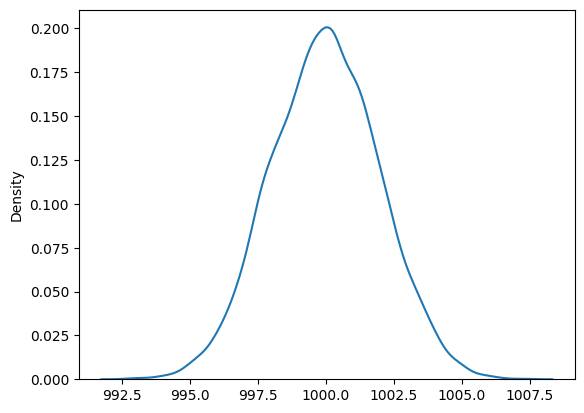

In [41]:
import seaborn as sns

sns.kdeplot(X_large)

<Axes: ylabel='Density'>

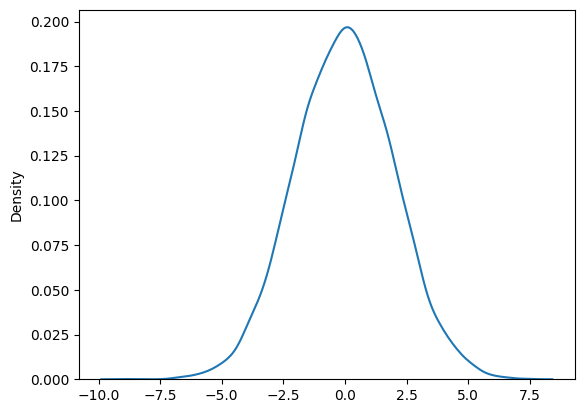

In [42]:
sns.kdeplot(x_small)

<Axes: ylabel='Density'>

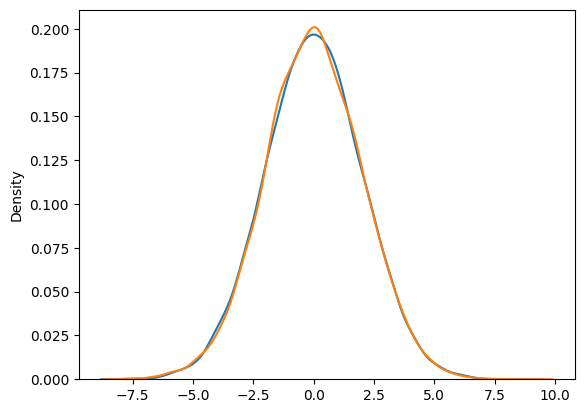

In [38]:
import seaborn as sns
def standardize(x):
    return (x - np.mean(x)) #/ np.std(x)
sns.kdeplot(standardize(X_large))
sns.kdeplot(standardize(x_small))

In [34]:
np.var(standardize(X_large))

1.0

Explained Variance Ratio: [0.53882594 0.46117406]


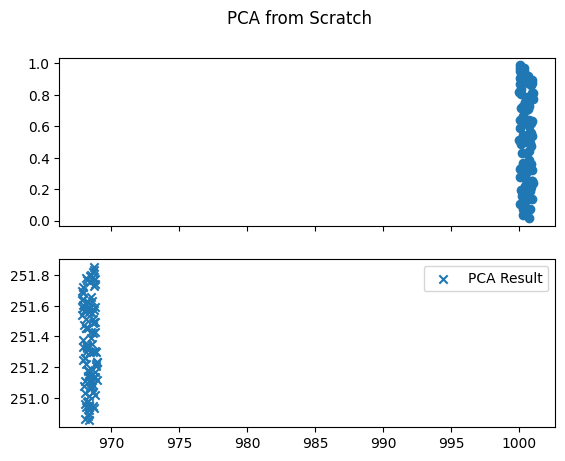

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random data with 2 features
np.random.seed(42)
data = np.random.rand(100, 2)
data[:, 0] = data[:, 0]  + np.random.normal(loc=1000, scale=0, size=100)

# Center the data (subtract the mean of each feature)
mean_centered_data = data #- np.mean(data, axis=0)

# Calculate the covariance matrix
covariance_matrix = np.cov(mean_centered_data, rowvar=False)

# Calculate the eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

# Sort eigenvalues and corresponding eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Choose the top k eigenvectors based on the desired number of principal components (k)
k = 1
top_eigenvectors = eigenvectors[:, :k]

# Project the original data onto the new k-dimensional space
pca_result = np.dot(mean_centered_data, top_eigenvectors)
pc_1 = np.dot(mean_centered_data,  eigenvectors[:, :1])
pc_2 = np.dot(mean_centered_data,  eigenvectors[:, 1:2])


# Explained variance ratio
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
print(f"Explained Variance Ratio: {explained_variance_ratio}")

fig, axs = plt.subplots(2,1, sharex=True)
# Plot the original data and the PCA result
axs[0].scatter(data[:, 0], data[:, 1], label='Original Data')
#plt.scatter(pca_result[:, 0], np.zeros_like(pca_result), label='PCA Result', marker='x')
axs[1].scatter(pc_1, pc_2, label='PCA Result', marker='x')
#plt.scatter(mean_centered_data[:, 0], mean_centered_data[:, 1] , label='Mean Centered Data', marker='o')

fig.suptitle('PCA from Scratch')
plt.legend()
plt.show()


In [24]:
covariance_matrix

array([[ 0.09332402, -0.00329452],
       [-0.00329452,  0.08145856]])